In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('McDonaldsMenuNutrition.csv')

In [3]:
df.head()

,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,Hamburger,250.0,80.0,9.0,3.5,0.5,25.0,520.0,31.0,2.0,6.0,12.0,247.5
1,Cheeseburger,300.0,110.0,12.0,6,0.5,40.0,750.0,33.0,2.0,6.0,15.0,297.0
2,Double Cheeseburger,440.0,210.0,23.0,11,1.5,80.0,1150.0,34.0,2.0,7.0,25.0,433.0
3,McDouble,390.0,170.0,19.0,8,1.0,65.0,920.0,33.0,2.0,7.0,22.0,383.0
4,Quarter Pounder® with Cheese,510.0,230.0,26.0,12,1.5,90.0,1190.0,40.0,3.0,9.0,29.0,502.0


In [4]:
df.isna().any

<bound method NDFrame._add_numeric_operations.<locals>.any of       Item  Calories  Calories from\nFat  Total Fat\n(g)  Saturated Fat\n(g)  \
0    False     False               False           False               False   
1    False     False               False           False               False   
2    False     False               False           False               False   
3    False     False               False           False               False   
4    False     False               False           False               False   
..     ...       ...                 ...             ...                 ...   
325  False     False               False           False               False   
326  False     False               False           False               False   
327  False     False               False           False               False   
328  False     False               False           False               False   
329  False     False               False           False  

In [5]:
df.isna().sum()

Item                     0
Calories                 2
Calories from\nFat       5
Total Fat\n(g)           2
Saturated Fat\n(g)       2
Trans Fat\n(g)           2
Cholesterol\n(mg)        2
Sodium \n(mg)            2
Carbs\n(g)               2
Fiber\n(g)               2
Sugars\n(g)              2
Protein\n(g)             2
Weight Watchers\nPnts    5
dtype: int64

In [6]:
df.dtypes

Item                      object
Calories                 float64
Calories from\nFat       float64
Total Fat\n(g)           float64
Saturated Fat\n(g)        object
Trans Fat\n(g)           float64
Cholesterol\n(mg)        float64
Sodium \n(mg)            float64
Carbs\n(g)               float64
Fiber\n(g)               float64
Sugars\n(g)              float64
Protein\n(g)             float64
Weight Watchers\nPnts    float64
dtype: object

C:\Users\anagha\AppData\Local\Temp\ipykernel_10124\3050323975.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)


<AxesSubplot: >

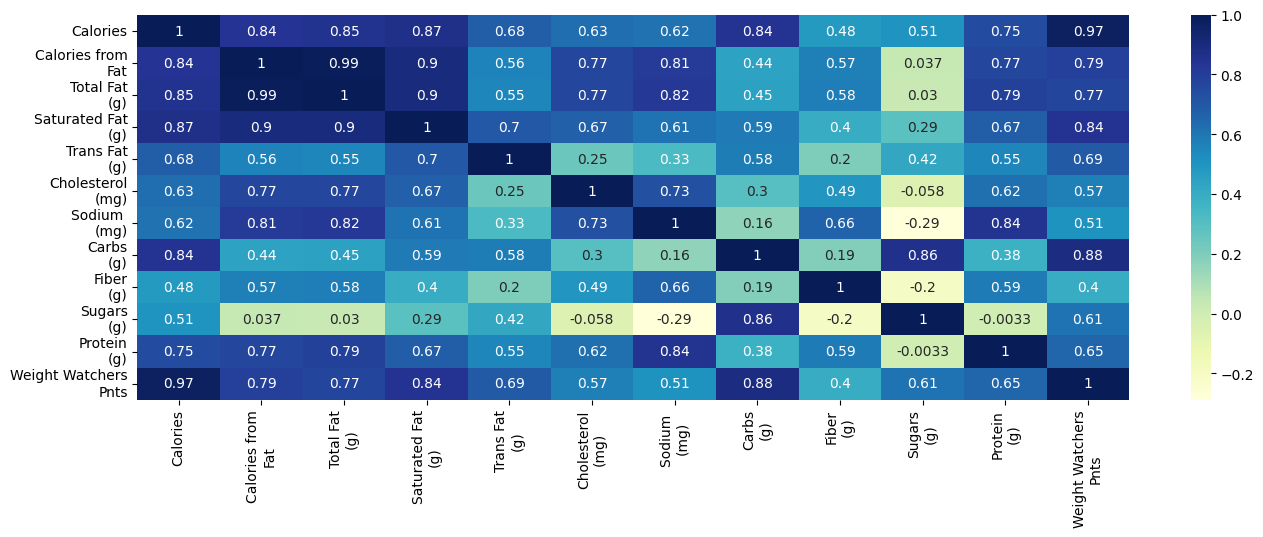

In [24]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.figure(figsize = (16,5))
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

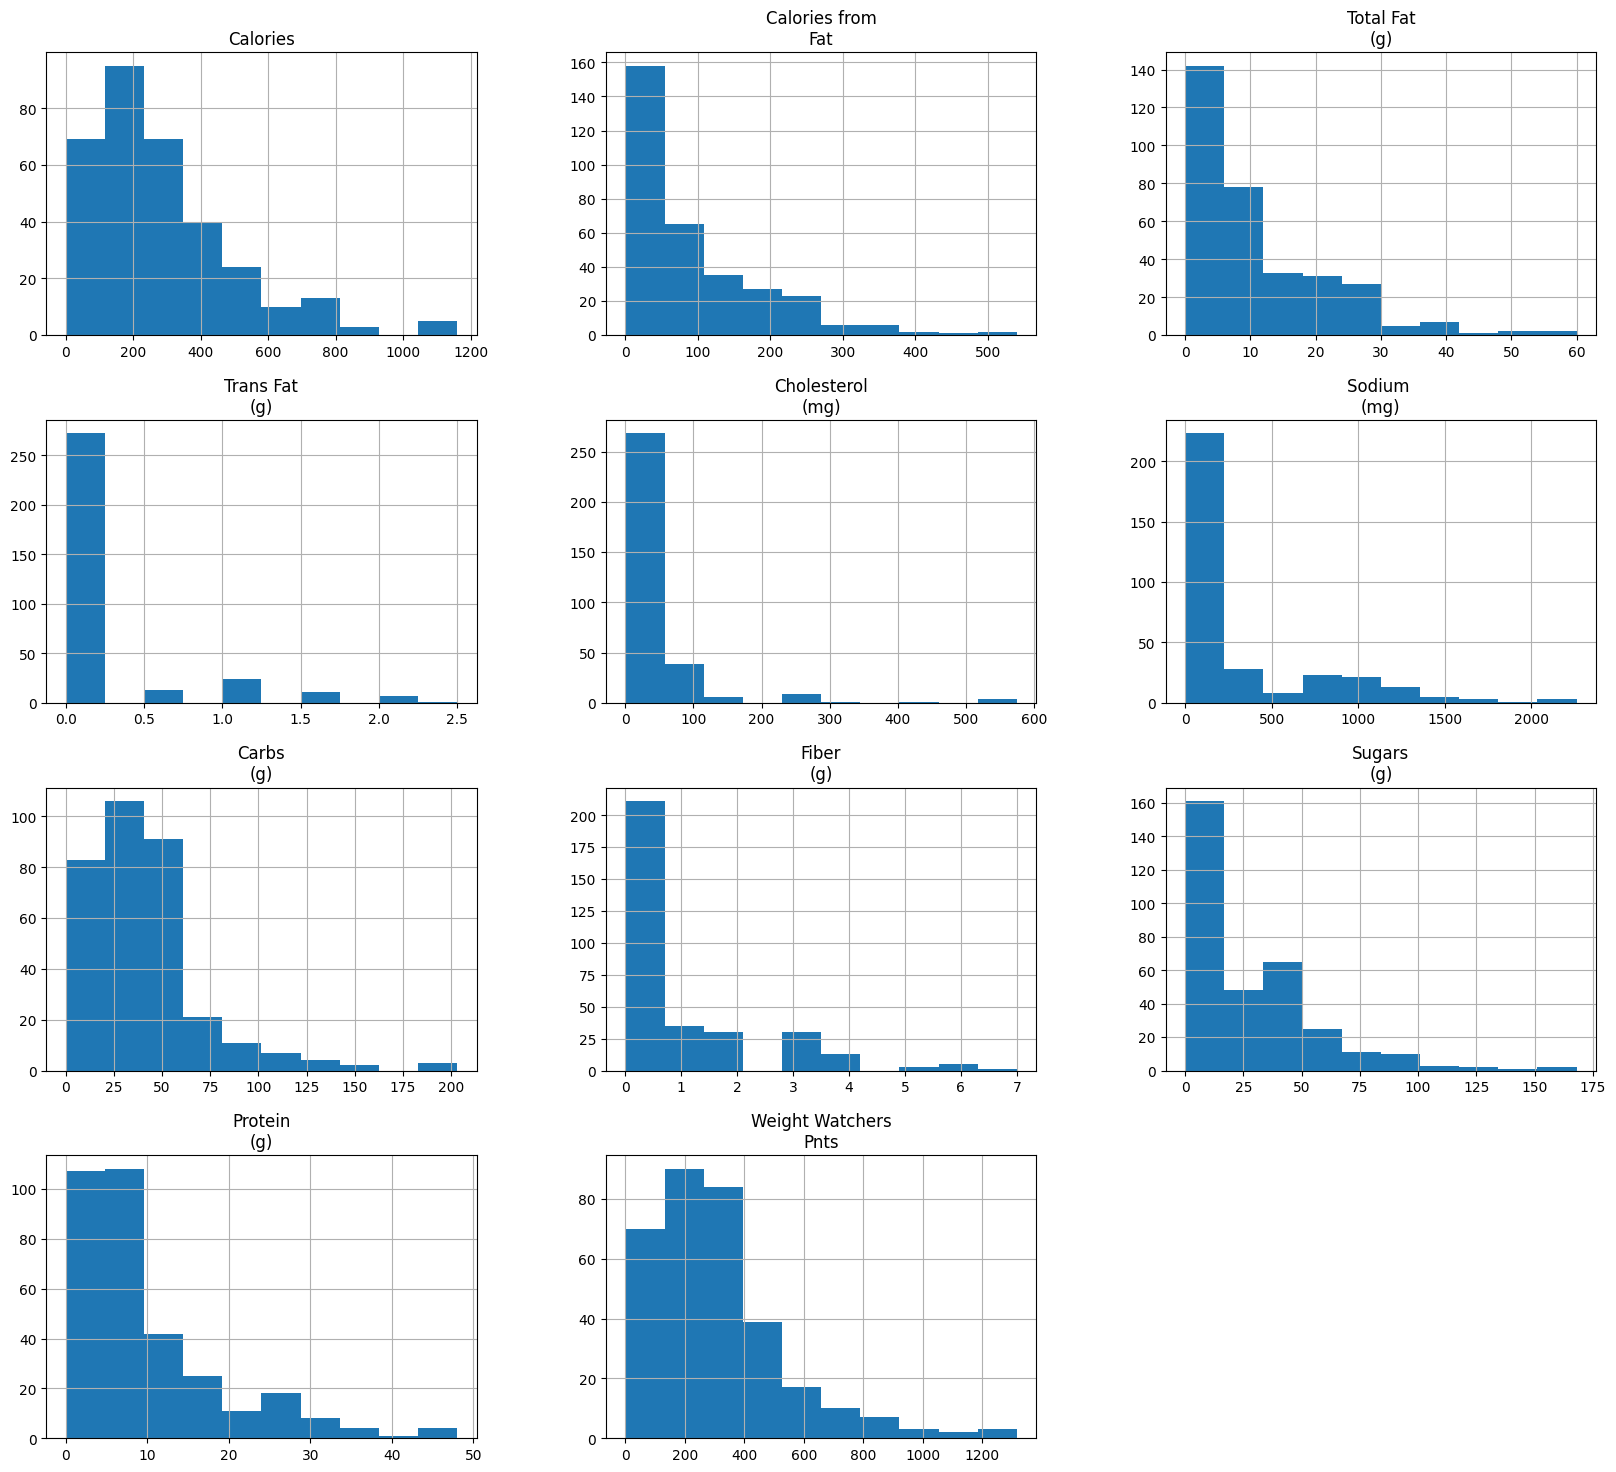

In [8]:
df.hist(figsize = (20, 18))
plt.show()

In [9]:
df = df.fillna(0)

In [10]:
df.isna().sum()

Item                     0
Calories                 0
Calories from\nFat       0
Total Fat\n(g)           0
Saturated Fat\n(g)       0
Trans Fat\n(g)           0
Cholesterol\n(mg)        0
Sodium \n(mg)            0
Carbs\n(g)               0
Fiber\n(g)               0
Sugars\n(g)              0
Protein\n(g)             0
Weight Watchers\nPnts    0
dtype: int64

In [26]:
df['Calories'] = df['Calories'].astype(float)
df = df.drop(['Fiber\n(g)','Sugars\n(g)'], axis = 1)

In [27]:
df['Calories from\nFat'] = df['Calories from\nFat'].astype(float)
df['Total Fat\n(g)'] = df['Total Fat\n(g)'].astype(float)
df.loc[df["Item"] == "Hamburger Happy Meal", "Saturated Fat\n(g)"] = 5.5
df['Saturated Fat\n(g)'] = df['Saturated Fat\n(g)'].astype(float)
df['Cholesterol\n(mg)'] = df['Cholesterol\n(mg)'].astype(float)
df['Sodium \n(mg)'] = df['Sodium \n(mg)'].astype(float)
df['Carbs\n(g)'] = df['Carbs\n(g)'].astype(float)
df['Protein\n(g)'] = df['Protein\n(g)'].astype(float)
# df['Sugars\n(g)'] = df['Sugars\n(g)'].astype(float)
df['Weight Watchers\nPnts'] = df['Weight Watchers\nPnts'].astype(float)

In [28]:
X = df.drop(['Calories','Item'], axis = 1)
y = df['Calories']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
lr.coef_

array([-1.13293982e+00,  1.60731501e+01, -1.47804277e+00,  4.13788861e+00,
        3.96952943e-03,  1.28669369e-02,  2.14826158e+00,  2.65832705e+00,
        3.90274357e-01])

In [40]:
pr = lr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

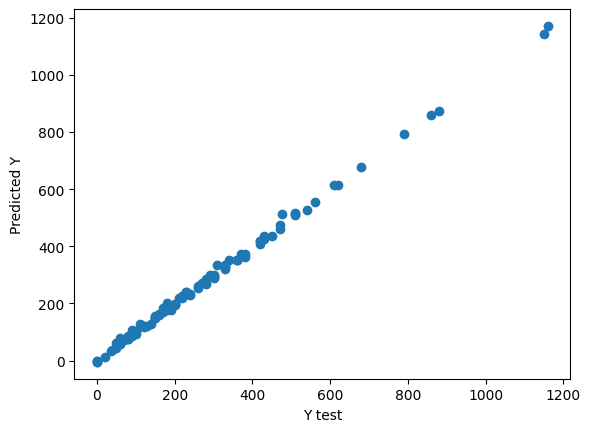

In [41]:
plt.scatter(y_test,pr)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

In [42]:
from sklearn import metrics

In [43]:
print("MAE:",metrics.mean_absolute_error(y_test,pr))
print("MSE:",metrics.mean_squared_error(y_test,pr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pr)))

MAE: 6.515133471396069
MSE: 79.99579136379381
RMSE: 8.94403663698857


C:\Users\anagha\AppData\Local\Temp\ipykernel_10124\2571337981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - pr)


<AxesSubplot: xlabel='Calories', ylabel='Density'>

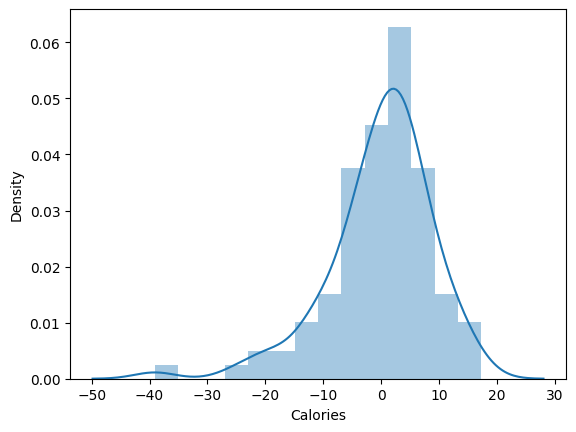

In [44]:
sns.distplot(y_test - pr)